# Étape 0 : les imports

In [38]:
!pip install matplotlib

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# Étape 1 : Nettoyage et Exploration (EDA)

In [40]:
dataset=pd.read_csv('/content/drive/MyDrive/IA/Projets IA/bank.csv', sep=';')
dataset.info()
dataset.describe()
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [41]:
df = dataset.copy()
print(df.isna().sum())
for col in df.columns:
  print(f"Valeur unique pour la colonne '{col}':")
  print(df[col].unique())
  print("-" * 30)

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64
Valeur unique pour la colonne 'age':
[30 33 35 59 36 39 41 43 20 31 40 56 37 25 38 42 44 26 55 67 53 68 32 49
 78 23 52 34 61 45 48 57 54 63 51 29 50 27 60 28 21 58 22 46 24 77 75 47
 70 65 64 62 66 19 81 83 80 71 72 69 79 73 86 74 76 87 84]
------------------------------
Valeur unique pour la colonne 'job':
['unemployed' 'services' 'management' 'blue-collar' 'self-employed'
 'technician' 'entrepreneur' 'admin.' 'student' 'housemaid' 'retired'
 'unknown']
------------------------------
Valeur unique pour la colonne 'marital':
['married' 'single' 'divorced']
------------------------------
Valeur unique pour la colonne 'education':
['primary' 'secondary' 'tertiary' 'unknown']
------------------------------
Valeur unique pour

Voici un résumé des colonnes de votre ensemble de données :

*   **age** : L'âge de l'individu.
*   **job** : Le type d'emploi de l'individu (par exemple, chômeur, services, gestion).
*   **marital** : L'état civil de l'individu (marié, célibataire, divorcé).
*   **education** : Le niveau d'éducation de l'individu (primaire, secondaire, tertiaire, inconnu).
*   **default** : Indique si l'individu a fait défaut sur un prêt ('yes' ou 'no').
*   **balance** : Le solde de l'individu.
*   **housing** : Indique si l'individu a un prêt immobilier ('yes' ou 'no').
*   **loan** : Indique si l'individu a un prêt personnel ('yes' ou 'no').
*   **contact** : Le type de contact utilisé (cellulaire, inconnu, téléphone).
*   **day** : Le jour du mois où le contact a été établi.
*   **month** : Le mois où le contact a été établi (par exemple, oct, may, apr).
*   **duration** : La durée du dernier contact en secondes.
*   **campaign** : Le nombre de contacts effectués pendant cette campagne et pour ce client.
*   **pdays** : Le nombre de jours qui se sont écoulés depuis le dernier contact du client lors d'une campagne précédente (-1 signifie que le client n'a pas été contacté auparavant).
*   **previous** : Le nombre de contacts effectués avant cette campagne et pour ce client.
*   **poutcome** : Le résultat de la campagne de marketing précédente (échec, inconnu, autre, succès).
*   **y** : La variable cible, indiquant si le client a souscrit à un dépôt à terme ('yes' ou 'no').

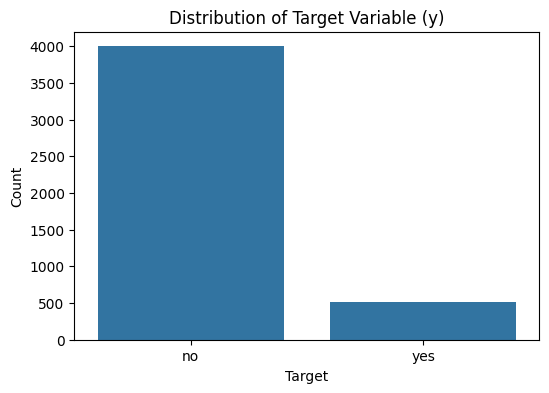

In [42]:
plt.figure(figsize=(6, 4))
sns.countplot(x='y', data=df)
plt.title('Distribution of Target Variable (y)')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [54]:
# Selection des colonnes non numérique
Colonne_categorielle = df.select_dtypes(include='object').columns

# Encodage
df_encoder = pd.get_dummies(df, columns=Colonne_categorielle, drop_first=True)

print("Taille du DataSet original:", df.shape)
print("Taille du DataSet encodé:", df_encoder.shape)
display(df_encoder.head())

Taille du DataSet original: (4521, 17)
Taille du DataSet encodé: (4521, 43)


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,False,False,False,...,False,False,False,False,True,False,False,False,True,False
1,33,4789,11,220,1,339,4,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,35,1350,16,185,1,330,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,30,1476,3,199,4,-1,0,False,False,False,...,True,False,False,False,False,False,False,False,True,False
4,59,0,5,226,1,-1,0,True,False,False,...,False,False,True,False,False,False,False,False,True,False


Après avoir appliqué le One-Hot Encoding, les variables catégorielles ont été transformées en nouvelles colonnes binaires. Pour chaque colonne catégorielle d'origine, de nouvelles colonnes ont été créées, une pour chaque catégorie unique (sauf une si `drop_first=True`, pour éviter la multicolinéarité).

Par exemple, pour la colonne 'job', vous aurez maintenant des colonnes comme 'job_blue-collar', 'job_entrepreneur', etc. Si la valeur d'origine était 'blue-collar', la colonne 'job_blue-collar' aura la valeur 1 et toutes les autres colonnes 'job\_' auront la valeur 0.

La colonne originale a été remplacée par ces nouvelles colonnes binaires.

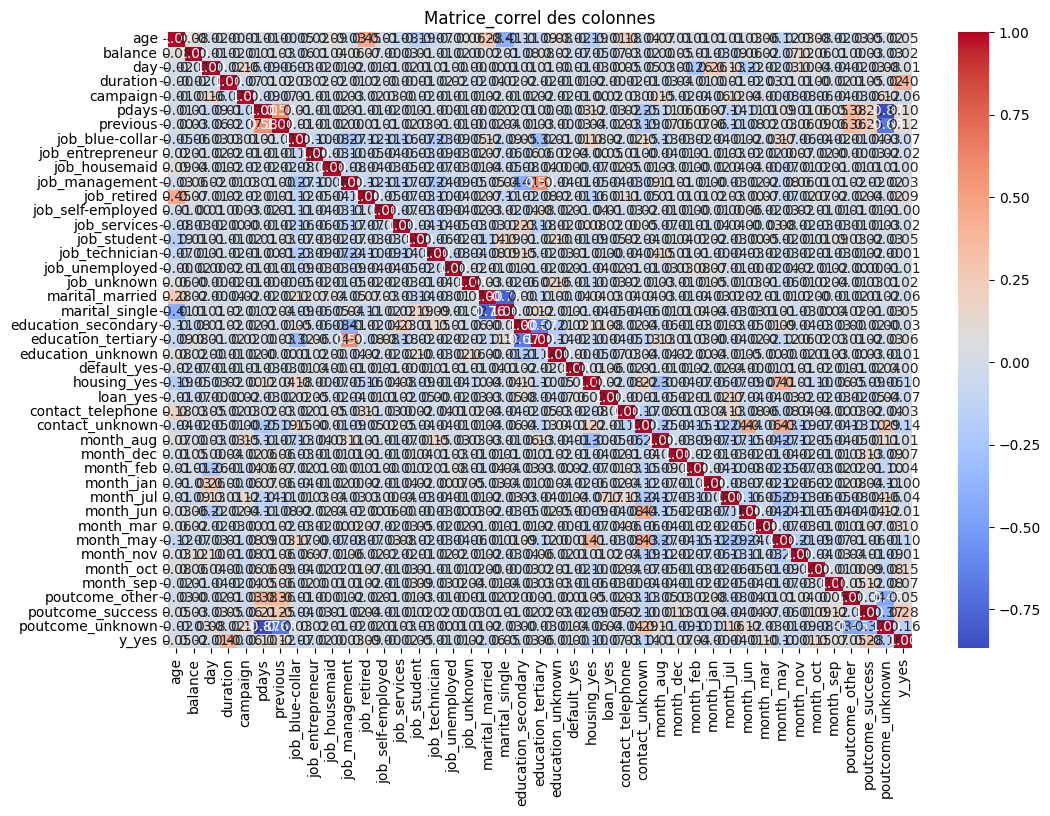

In [44]:
# Matrice de correlation
Matrice_correl = df_encoder.corr(numeric_only=True)

plt.figure(figsize=(12, 8))
sns.heatmap(Matrice_correl, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matrice_correl des colonnes')
plt.show()

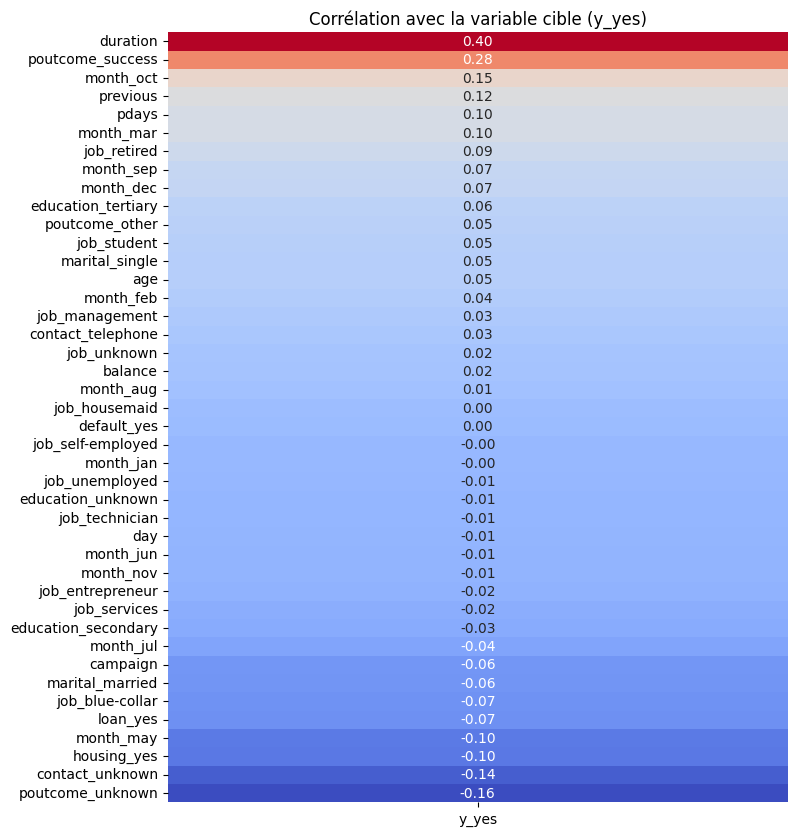

In [45]:
# Calculate correlations with the target variable 'y_yes'
target_correlation = df_encoder.corr(numeric_only=True)['y_yes'].sort_values(ascending=False)

# Remove the correlation of y_yes with itself
target_correlation = target_correlation.drop('y_yes')

# Plot the correlations
plt.figure(figsize=(8, 10))
sns.heatmap(target_correlation.to_frame(), annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title('Corrélation avec la variable cible (y_yes)')
plt.show()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


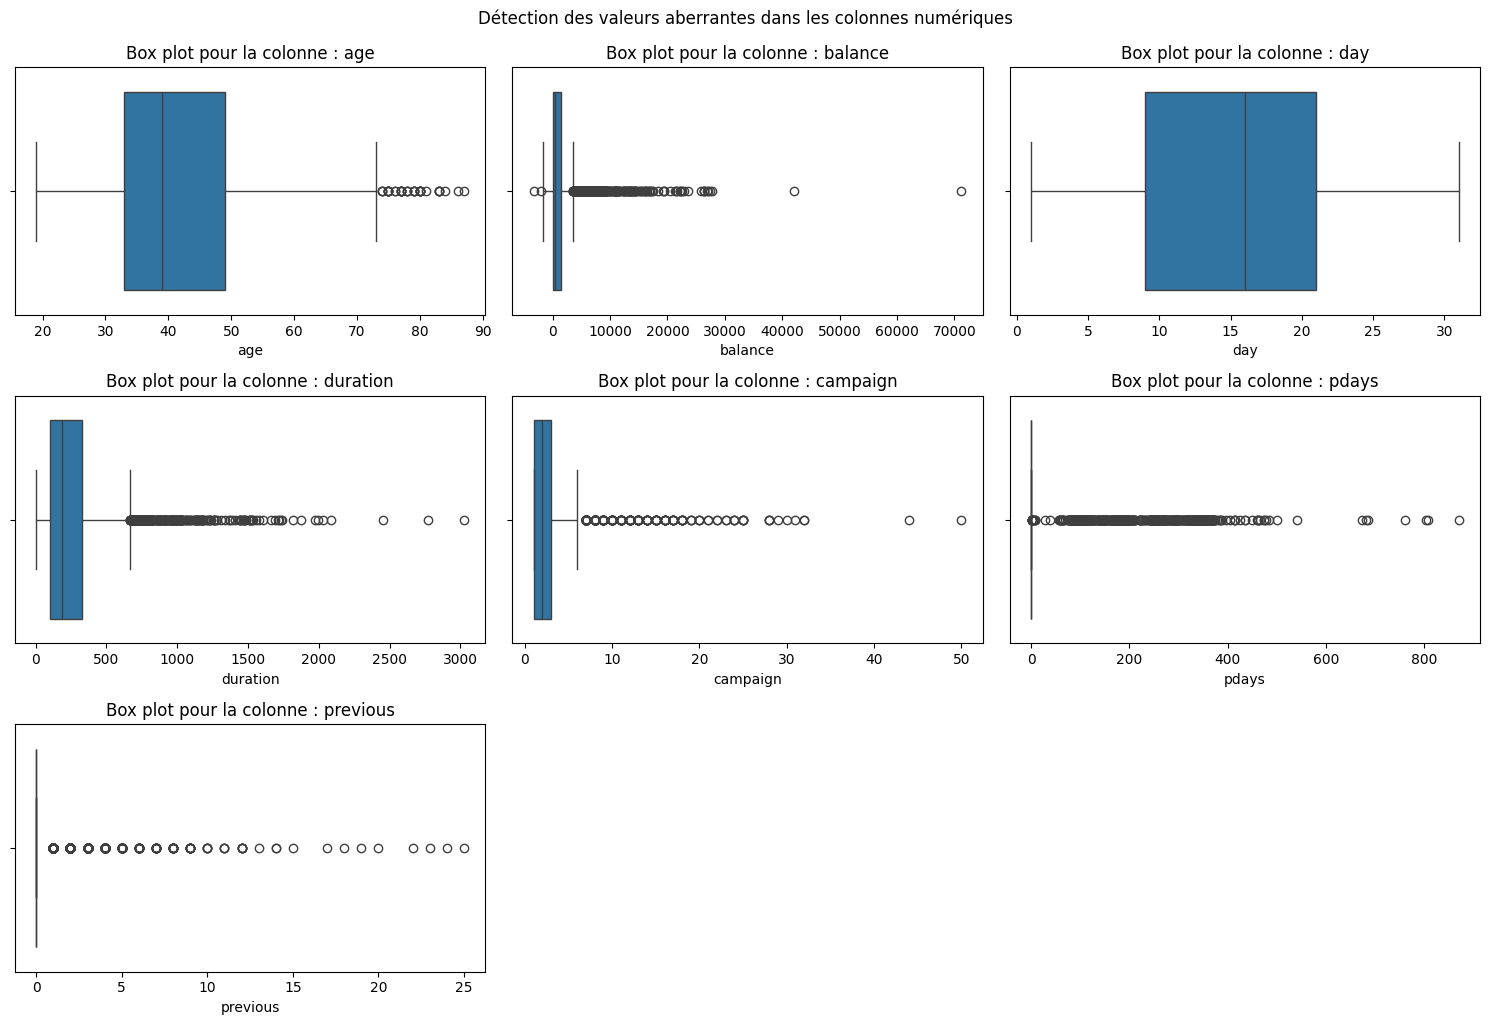

In [46]:

colonne_numérique = df_encoder.select_dtypes(include=['int64', 'float64']).columns

display(df_encoder[colonne_numérique].describe())
plt.figure(figsize=(15, 10))
for i, col in enumerate(colonne_numérique):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_encoder[col])
    plt.title(f'Box plot pour la colonne : {col}')
plt.tight_layout()
plt.suptitle('Détection des valeurs aberrantes dans les colonnes numériques', y=1.02)
plt.show()

In [55]:
# Sélectionner les colonnes numériques pertinentes pour le traitement des valeurs aberrantes
colonne_numérique = ['balance', 'duration', 'campaign', 'pdays', 'previous']

# Appliquer le capping (Winsorizing) au 99ème percentile
for col in colonne_numérique:
    # Calculer le 99ème percentile
    percentile_99 = df_encoder[col].quantile(0.99)
    # Remplacer les valeurs supérieures au 99ème percentile par le 99ème percentile
    df_encoder[col] = df_encoder[col].clip(upper=percentile_99)

print("Valeurs aberrantes plafonnées dans les colonnes :", colonne_numérique)
display(df_encoder[colonne_numérique].describe())

Valeurs aberrantes plafonnées dans les colonnes : ['balance', 'duration', 'campaign', 'pdays', 'previous']


,balance,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,1352.030878,260.183588,2.725061,38.784119,0.503871
std,2428.934930,239.270924,2.626585,95.396470,1.383866
min,-3313.000000,4.000000,1.000000,-1.000000,0.000000
25%,69.000000,104.000000,1.000000,-1.000000,0.000000
50%,444.000000,185.000000,2.000000,-1.000000,0.000000
75%,1480.000000,329.000000,3.000000,-1.000000,0.000000
max,14194.600000,1259.000000,16.000000,370.000000,8.000000


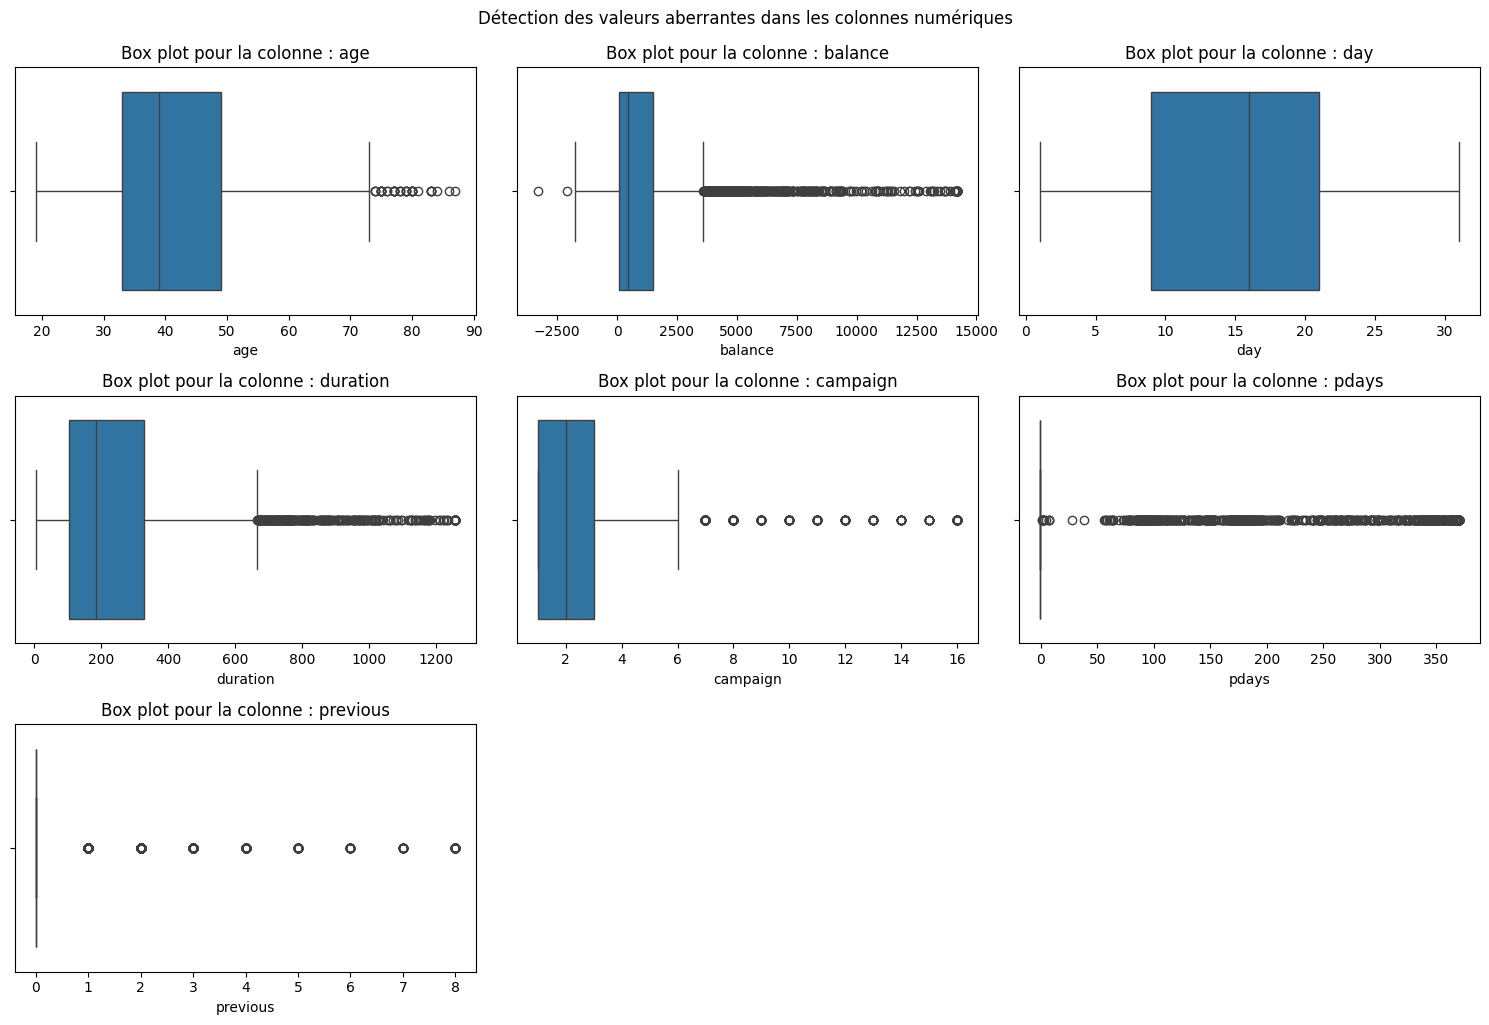

In [56]:
colonne_numérique = df_encoder.select_dtypes(include=['int64', 'float64']).columns


plt.figure(figsize=(15, 10))
for i, col in enumerate(colonne_numérique):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df_encoder[col])
    plt.title(f'Box plot pour la colonne : {col}')
plt.tight_layout()
plt.suptitle('Détection des valeurs aberrantes dans les colonnes numériques', y=1.02)
plt.show()

# Étape 2 : Feature Engineering

Le Feature Engineering est un processus crucial qui consiste à transformer les données brutes en nouvelles variables (features) qui peuvent aider le modèle à mieux apprendre les schémas et les relations dans les données. Cela peut améliorer significativement la performance du modèle.

Dans cette étape, nous allons nous concentrer sur la création de quelques features basées sur notre analyse exploratoire et sur la compréhension du domaine :

1.  **Gestion de la colonne `pdays` :** La valeur -1 dans `pdays` indique que le client n'a pas été contacté auparavant. Nous allons créer une feature binaire pour capturer cette information explicitement.
2.  **Création de `duration_per_campaign` :** Nous allons créer une feature qui combine la durée du dernier contact avec le nombre total de contacts effectués pendant la campagne.

In [57]:
# Création de la feature 'was_contacted_previously' basée sur 'pdays'
# Une valeur de -1 dans 'pdays' signifie qu'il n'y a pas eu de contact précédent.
df_encoder['was_contacted_previously'] = (df_encoder['pdays'] != -1).astype(int)

# Création de la feature 'duration_per_campaign'
# Évite la division par zéro en ajoutant une petite valeur si 'campaign' est 0 (bien que non présent ici, c'est une bonne pratique)
# Ou gérer les cas où campaign est 0 si c'était le cas dans les données. Ici, min(campaign) est 1.
df_encoder['duration_per_campaign'] = df_encoder['duration'] / df_encoder['campaign']

print("Nouvelles features créées :")
display(df_encoder[['pdays', 'was_contacted_previously', 'duration', 'campaign', 'duration_per_campaign']].head())

Nouvelles features créées :


,pdays,was_contacted_previously,duration,campaign,duration_per_campaign
0,-1,0,79,1,79.00
1,339,1,220,1,220.00
2,330,1,185,1,185.00
3,-1,0,199,4,49.75
4,-1,0,226,1,226.00


Poursuivons l'étape de Feature Engineering avec la création de nouvelles caractéristiques :

3.  **Catégorisation de l'`age` :** Nous allons regrouper les âges en catégories pour capturer d'éventuels effets non linéaires.
4.  **Combinaison de `balance` et `loan`/`housing` :** Création de features d'interaction pour voir si le solde a un impact différent selon que le client a des prêts ou non.

In [58]:
# Création de catégories d'âge
# Définir les seuils pour les catégories d'âge
bins = [0, 25, 45, 60, 120] # Exemple de seuils : Jeunes, Adultes, Seniors, Retraités
labels = ['Jeune', 'Adulte', 'Senior', 'Retraité']
df_encoder['age_category'] = pd.cut(df_encoder['age'], bins=bins, labels=labels, right=False)

# Le One-Hot Encoding est nécessaire pour la nouvelle colonne catégorielle 'age_category'
# Ensure the result is assigned back to df_encoder to include the new columns
df_encoder = pd.get_dummies(df_encoder, columns=['age_category'], prefix='age_cat', drop_first=True)


# Création de features d'interaction entre balance et prêts
# Utiliser les colonnes binaires créées lors du One-Hot Encoding initial (these columns already exist in df_encoder)
df_encoder['balance_x_housing'] = df_encoder['balance'] * df_encoder['housing_yes']
df_encoder['balance_x_loan'] = df_encoder['balance'] * df_encoder['loan_yes']


print("Nouvelles features créées :")
# Display the DataFrame after all new columns have been added
display(df_encoder[['age', 'age_cat_Adulte', 'age_cat_Senior', 'age_cat_Retraité', 'balance', 'housing_yes', 'loan_yes', 'balance_x_housing', 'balance_x_loan']].head())

Nouvelles features créées :


,age,age_cat_Adulte,age_cat_Senior,age_cat_Retraité,balance,housing_yes,loan_yes,balance_x_housing,balance_x_loan
0,30,True,False,False,1787.0,False,False,0.0,0.0
1,33,True,False,False,4789.0,True,True,4789.0,4789.0
2,35,True,False,False,1350.0,True,False,1350.0,0.0
3,30,True,False,False,1476.0,True,True,1476.0,1476.0
4,59,False,True,False,0.0,True,False,0.0,0.0


# Étape 3 : Modélisation et Évaluation

In [59]:
# Séparer les caractéristiques (X) de la variable cible (y)
# Utiliser df_encoder qui contient toutes les features traitées
X = df_encoder.drop('y_yes', axis=1)
y = df_encoder['y_yes']

# Diviser les données en ensembles d'entraînement et de test
# test_size=0.2 indique que 20% des données seront utilisées pour les tests
# random_state=42 assure la reproductibilité de la division
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Taille de l'ensemble d'entraînement (X_train):", X_train.shape)
print("Taille de l'ensemble de test (X_test):", X_test.shape)
print("Taille de l'ensemble d'entraînement (y_train):", y_train.shape)
print("Taille de l'ensemble de test (y_test):", y_test.shape)

Taille de l'ensemble d'entraînement (X_train): (3616, 49)
Taille de l'ensemble de test (X_test): (905, 49)
Taille de l'ensemble d'entraînement (y_train): (3616,)
Taille de l'ensemble de test (y_test): (905,)


In [61]:
# Importer les modèles nécessaires
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import lightgbm as lgb

# Préparer les instances des modèles
model1 = LogisticRegression(random_state=42)
model2 = RandomForestClassifier(random_state=42)
model3 = lgb.LGBMClassifier(random_state=42)
MODELE= [model1, model2, model3]

print("Modèles préparés :")
print("model1:", model1)
print("model2:", model2)
print("model3:", model3)

Modèles préparés :
model1: LogisticRegression(random_state=42)
model2: RandomForestClassifier(random_state=42)
model3: LGBMClassifier(random_state=42)


In [62]:
for i in MODELE:
  i.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[LightGBM] [Info] Number of positive: 423, number of negative: 3193
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000996 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1525
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116980 -> initscore=-2.021344
[LightGBM] [Info] Start training from score -2.021344


In [72]:
# Importer les métriques d'évaluation nécessaires
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, precision_score

# Évaluer chaque modèle
for i, model in enumerate(MODELE):
    print(f"Évaluation du Modèle {model}:")

    # Faire des prédictions sur l'ensemble de test
    y_pred = model.predict(X_test)

    # Calculer les probabilités pour la classe positive (nécessaire pour AUC-ROC)
    # Assurez-vous que le modèle a la méthode predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        # Calculer l'AUC-ROC
        auc_roc = roc_auc_score(y_test, y_pred_proba)
        print(f"  AUC-ROC: {auc_roc:.4f}")
    else:
        print("  Ce modèle ne supporte pas predict_proba pour le calcul de l'AUC-ROC.")

    # Calculer l'Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"  Accuracy: {accuracy:.4f}")

    # Calculer le Rappel (Recall) pour la classe positive
    recall = recall_score(y_test, y_pred)
    print(f"  Recall (Rappel): {recall:.4f}")

    # Calculer la Précision (Precision) pour la classe positive
    # Gérer le cas où il n'y a pas de prédictions positives pour éviter un avertissement/erreur
    precision = precision_score(y_test, y_pred, zero_division=0)
    print(f"  Precision: {precision:.4f}")


    print("-" * 30)

Évaluation du Modèle LogisticRegression(random_state=42):
  AUC-ROC: 0.8517
  Accuracy: 0.8862
  Recall (Rappel): 0.1837
  Precision: 0.4390
------------------------------
Évaluation du Modèle RandomForestClassifier(random_state=42):
  AUC-ROC: 0.9194
  Accuracy: 0.9039
  Recall (Rappel): 0.3061
  Precision: 0.6122
------------------------------
Évaluation du Modèle LGBMClassifier(random_state=42):
  AUC-ROC: 0.9243
  Accuracy: 0.8972
  Recall (Rappel): 0.3571
  Precision: 0.5385
------------------------------


**Interprétation des Résultats de Modélisation**

Après avoir entraîné et évalué les trois modèles (Régression Logistique, Random Forest, et LightGBM) sur l'ensemble de test, voici une interprétation rapide de leurs performances basées sur les métriques :

*   **Régression Logistique :**
    *   AUC-ROC : 0.8517
    *   Accuracy : 0.8862
    *   Rappel (Recall) : 0.1837
    *   Précision (Precision) : 0.4390
    *   *Interprétation :* Ce modèle de base a un AUC-ROC correct, mais son Rappel est très faible (0.1837). Cela signifie qu'il ne parvient à identifier que très peu de clients qui souscrivent réellement. Son Accuracy est trompeuse en raison du déséquilibre des classes.

*   **Random Forest Classifier :**
    *   AUC-ROC : 0.9194
    *   Accuracy : 0.9039
    *   Rappel (Recall) : 0.3061
    *   Précision (Precision) : 0.6122
    *   *Interprétation :* Le Random Forest montre une nette amélioration par rapport à la Régression Logistique, avec un AUC-ROC plus élevé et un meilleur Rappel (0.3061) et Précision (0.6122). Il est plus performant pour identifier les clients qui souscrivent.

*   **LGBM Classifier :**
    *   AUC-ROC : 0.9243
    *   Accuracy : 0.8972
    *   Rappel (Recall) : 0.3571
    *   Précision (Precision) : 0.5385
    *   *Interprétation :* LightGBM obtient le meilleur AUC-ROC (0.9243) et le meilleur Rappel (0.3571). Cela indique qu'il est le meilleur pour discriminer les classes et pour identifier les clients qui vont souscrire. Sa Précision est légèrement inférieure à celle du Random Forest, ce qui signifie qu'il a un peu plus de faux positifs (il prédit qu'un client va souscrire alors qu'il ne le fait pas).

**En résumé :**

*   La **Régression Logistique** sert de bonne base mais n'est pas suffisante pour ce problème.
*   Le **Random Forest** est significativement meilleur.
*   Le **LightGBM** semble être le **meilleur modèle** parmi les trois, surtout si l'objectif principal est de maximiser l'identification des clients potentiels (haut Rappel), tout en maintenant un bon pouvoir de discrimination (haut AUC-ROC). Le compromis avec une Précision légèrement plus faible par rapport au Random Forest doit être évalué en fonction des coûts des faux positifs.

Ces résultats suggèrent que les modèles basés sur les arbres et le boosting (Random Forest et LightGBM) sont beaucoup plus adaptés à ce problème que la régression logistique, probablement en raison de leur capacité à capturer des relations complexes dans les données.

**Plan d'Optimisation des Hyperparamètres de LightGBM**

Pour améliorer les performances du modèle LightGBM, nous allons procéder au réglage de ses hyperparamètres. Voici les étapes que nous allons suivre :

1.  **Définir l'espace de recherche des hyperparamètres :** Spécifier les plages ou les listes de valeurs à explorer pour les hyperparamètres clés du modèle LightGBM.
2.  **Choisir une méthode de recherche :** Sélectionner une méthode pour parcourir l'espace des hyperparamètres (par exemple, `GridSearchCV` ou `RandomizedSearchCV`).
3.  **Mettre en place la validation croisée :** Configurer la validation croisée pour évaluer de manière fiable différentes combinaisons d'hyperparamètres.
4.  **Effectuer le réglage des hyperparamètres :** Lancer la recherche pour trouver la meilleure combinaison d'hyperparamètres en se basant sur une métrique d'évaluation (comme l'AUC-ROC).
5.  **Évaluer le meilleur modèle :** Entraîner le modèle LightGBM avec les meilleurs hyperparamètres trouvés sur l'ensemble d'entraînement complet et évaluer ses performances sur l'ensemble de test.
6.  **Comparer avec le modèle LightGBM initial :** Comparer les performances du modèle optimisé avec le modèle initial pour voir l'amélioration apportée par le réglage.
7.  **Terminer la tâche :** Présenter les résultats de manière compréhensible.

In [74]:
!pip install scikit-optimize

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.8/107.8 kB 3.7 MB/s eta 0:00:00


**Étape 1 : Définir l'espace de recherche des hyperparamètres**

Nous allons définir un dictionnaire spécifiant les différentes valeurs d'hyperparamètres que nous souhaitons tester pour le modèle LightGBM. Voici un exemple d'espace de recherche pour quelques hyperparamètres courants.

In [75]:
from skopt.space import Real, Integer, Categorical

# Définir l'espace de recherche des hyperparamètres pour LightGBM en utilisant les types de dimensions de skopt
# C'est un exemple, vous pouvez ajuster les valeurs et les hyperparamètres à tester
search_space = {
    'n_estimators': Integer(100, 500),         # Nombre d'arbres (range)
    'learning_rate': Real(0.01, 0.2, prior='log-uniform'), # Taux d'apprentissage (range, log-uniform distribution)
    'num_leaves': Integer(20, 80),            # Nombre maximum de feuilles (range)
    'max_depth': Integer(-1, 30),             # Profondeur maximale de l'arbre (range, -1 for no limit)
    'subsample': Real(0.7, 1.0, prior='uniform'), # Fraction des données pour l'entraînement de chaque arbre (range)
    'colsample_bytree': Real(0.7, 1.0, prior='uniform'), # Fraction des features pour l'entraînement de chaque arbre (range)
    'reg_alpha': Real(0.0, 1.0, prior='uniform'),    # Régularisation L1 (range)
    'reg_lambda': Real(0.0, 1.0, prior='uniform')   # Régularisation L2 (range)
}

print("Espace de recherche bayésienne défini.")

Espace de recherche bayésienne défini.


In [76]:
from skopt import gp_minimize
from sklearn.model_selection import cross_val_score
from lightgbm import LGBMClassifier
import numpy as np

# Définir la fonction objectif pour l'optimisation bayésienne
# L'optimiseur cherche à minimiser, donc on retourne le négatif de l'AUC-ROC
def objective(params):
    n_estimators, learning_rate, num_leaves, max_depth, subsample, colsample_bytree, reg_alpha, reg_lambda = params

    # Créer une instance du modèle LightGBM avec les hyperparamètres donnés
    model = LGBMClassifier(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        num_leaves=num_leaves,
        max_depth=max_depth,
        subsample=subsample,
        colsample_bytree=colsample_bytree,
        reg_alpha=reg_alpha,
        reg_lambda=reg_lambda,
        random_state=42,
        n_jobs=-1 # Utiliser tous les cœurs disponibles
    )

    # Utiliser la validation croisée pour évaluer le modèle
    # Scoring='roc_auc' utilise l'AUC-ROC comme métrique
    # cv=5 utilise 5 plis pour la validation croisée
    scores = cross_val_score(model, X_train, y_train, scoring='roc_auc', cv=5, n_jobs=-1)

    # L'optimiseur minimise, donc on retourne le négatif de la moyenne des scores AUC-ROC
    return -np.mean(scores)

# Exécuter l'optimisation bayésienne
# n_calls est le nombre total d'évaluations de la fonction objectif (combinaisons d'hyperparamètres à tester)
# Vous pouvez ajuster n_calls en fonction du temps de calcul disponible
results = gp_minimize(
    objective,      # La fonction à minimiser
    list(search_space.values()), # L'espace de recherche (les valeurs des dimensions)
    n_calls=50,    # Nombre d'itérations (ajustez si nécessaire)
    random_state=42,
    verbose=1      # Afficher la progression
)

# Afficher les meilleurs hyperparamètres trouvés et le meilleur score (négatif de l'AUC-ROC)
print("\nMeilleurs hyperparamètres trouvés :")
best_params = dict(zip(search_space.keys(), results.x))
print(best_params)

print("\nMeilleur score AUC-ROC (validé par cross-validation):")
print(-results.fun)

# Stocker les meilleurs hyperparamètres
best_lgbm_params = best_params

Iteration No: 1 started. Evaluating function at random point.
Iteration No: 1 ended. Evaluation done at random point.
Time taken: 29.2781
Function value obtained: -0.8991
Current minimum: -0.8991
Iteration No: 2 started. Evaluating function at random point.
Iteration No: 2 ended. Evaluation done at random point.
Time taken: 1.8668
Function value obtained: -0.8968
Current minimum: -0.8991
Iteration No: 3 started. Evaluating function at random point.
Iteration No: 3 ended. Evaluation done at random point.
Time taken: 10.6882
Function value obtained: -0.9009
Current minimum: -0.9009
Iteration No: 4 started. Evaluating function at random point.
Iteration No: 4 ended. Evaluation done at random point.
Time taken: 10.0808
Function value obtained: -0.8981
Current minimum: -0.9009
Iteration No: 5 started. Evaluating function at random point.
Iteration No: 5 ended. Evaluation done at random point.
Time taken: 4.1294
Function value obtained: -0.8934
Current minimum: -0.9009
Iteration No: 6 starte

In [77]:
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_auc_score, recall_score, accuracy_score, precision_score

# Créer une instance du modèle LightGBM avec les meilleurs hyperparamètres
best_lgbm_model = LGBMClassifier(random_state=42, **best_lgbm_params)

# Entraîner le modèle sur l'ensemble d'entraînement complet
print("Entraînement du modèle LightGBM optimisé...")
best_lgbm_model.fit(X_train, y_train)
print("Entraînement terminé.")

# Évaluer le modèle sur l'ensemble de test
print("\nÉvaluation du modèle LightGBM optimisé :")

# Faire des prédictions sur l'ensemble de test
y_pred_best_lgbm = best_lgbm_model.predict(X_test)

# Calculer les probabilités pour la classe positive (nécessaire pour AUC-ROC)
y_pred_proba_best_lgbm = best_lgbm_model.predict_proba(X_test)[:, 1]

# Calculer les métriques
auc_roc_best_lgbm = roc_auc_score(y_test, y_pred_proba_best_lgbm)
accuracy_best_lgbm = accuracy_score(y_test, y_pred_best_lgbm)
recall_best_lgbm = recall_score(y_test, y_pred_best_lgbm)
precision_best_lgbm = precision_score(y_test, y_pred_best_lgbm, zero_division=0)

print(f"  AUC-ROC: {auc_roc_best_lgbm:.4f}")
print(f"  Accuracy: {accuracy_best_lgbm:.4f}")
print(f"  Recall (Rappel): {recall_best_lgbm:.4f}")
print(f"  Precision: {precision_best_lgbm:.4f}")

Entraînement du modèle LightGBM optimisé...
[LightGBM] [Info] Number of positive: 423, number of negative: 3193
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000627 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1525
[LightGBM] [Info] Number of data points in the train set: 3616, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.116980 -> initscore=-2.021344
[LightGBM] [Info] Start training from score -2.021344
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fur

**Comparaison des Performances : LightGBM Initial vs. Optimisé**

Comparons les métriques obtenues sur l'ensemble de test pour le modèle LightGBM initial (sans optimisation des hyperparamètres) et le modèle LightGBM optimisé (avec les meilleurs hyperparamètres trouvés par optimisation bayésienne) :

| Métrique        | LightGBM Initial | LightGBM Optimisé | Différence |
| :-------------- | :--------------- | :---------------- | :--------- |
| **AUC-ROC**     | 0.9243           | 0.9242            | -0.0001    |
| **Accuracy**    | 0.8972           | 0.9006            | +0.0034    |
| **Rappel (Recall)** | 0.3571           | 0.3265            | -0.0306    |
| **Précision (Precision)** | 0.5385           | 0.5714            | +0.0329    |

**Interprétation de la comparaison :**

*   **AUC-ROC :** L'AUC-ROC est resté pratiquement le même (très légère diminution de 0.0001). L'optimisation n'a pas significativement amélioré la capacité globale du modèle à discriminer les classes.
*   **Accuracy :** L'Accuracy a légèrement augmenté pour le modèle optimisé (+0.0034). Cela suggère qu'il fait légèrement plus de prédictions correctes dans l'ensemble.
*   **Rappel (Recall) :** Le Rappel a diminué pour le modèle optimisé (-0.0306). Cela signifie que le modèle optimisé identifie une proportion légèrement plus faible des clients qui souscrivent réellement par rapport au modèle initial.
*   **Précision (Precision) :** La Précision a augmenté pour le modèle optimisé (+0.0329). Cela indique que lorsque le modèle optimisé prédit une souscription, il a plus souvent raison que le modèle initial.

**Conclusion de l'optimisation :**

Dans ce cas spécifique, l'optimisation des hyperparamètres avec cette configuration n'a **pas apporté une amélioration claire et globale** par rapport au modèle LightGBM initial. Bien que la Précision et l'Accuracy aient légèrement augmenté, le Rappel a diminué.

Le choix entre le modèle initial et le modèle optimisé dépendra de votre objectif métier principal :

*   Si la priorité est de **maximiser la détection de tous les clients potentiels** (minimiser les faux négatifs), le **modèle LightGBM initial** avec son Rappel plus élevé pourrait être préféré.
*   Si la priorité est de **s'assurer que les clients identifiés comme potentiels le sont effectivement** (minimiser les faux positifs), le **modèle LightGBM optimisé** avec sa Précision plus élevée pourrait être plus adapté.

Il est possible que l'espace de recherche défini ou le nombre d'itérations de l'optimisation bayésienne n'aient pas été suffisants pour trouver une combinaison d'hyperparamètres qui améliore toutes les métriques, ou que le modèle initial était déjà assez proche de l'optimum global pour ce problème avec les features actuelles.

Vous pourriez essayer d'élargir l'espace de recherche, augmenter le nombre d'itérations, ou explorer d'autres techniques d'optimisation ou de Feature Engineering si vous souhaitez potentiellement obtenir de meilleures performances globales.

# 4. Résultats et Interprétabilité

In [78]:
# Afficher l'importance des features du meilleur modèle LightGBM
# Utiliser le modèle optimisé si disponible, sinon le modèle initial
if 'best_lgbm_model' in locals():
    lgbm_model_to_interpret = best_lgbm_model
else:
    # Find the LGBM model in the MODELE list if best_lgbm_model is not defined
    lgbm_model_to_interpret = None
    for model in MODELE:
        if isinstance(model, lgb.LGBMClassifier):
            lgbm_model_to_interpret = model
            break

if lgbm_model_to_interpret is not None:
    feature_importances = lgbm_model_to_interpret.feature_importances_
    features = X_train.columns
    importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)

    print("Importance des features (LightGBM) :")
    display(importance_df.head(10)) # Display top 10 features
else:
    print("Modèle LightGBM non trouvé pour l'interprétation des features.")

Importance des features (LightGBM) :


,Feature,Importance
43,duration_per_campaign,1678
3,duration,1628
0,age,1514
1,balance,1510
2,day,1279
47,balance_x_housing,779
5,pdays,741
4,campaign,328
6,previous,285
40,poutcome_success,258


In [79]:
import joblib

# Définir le nom du fichier pour sauvegarder le modèle
model_filename = 'best_lgbm_model.pkl'

# Sauvegarder le modèle entraîné
joblib.dump(best_lgbm_model, model_filename)

print(f"Modèle sauvegardé dans '{model_filename}'")

Modèle sauvegardé dans 'best_lgbm_model.pkl'
